In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer, f1_score, classification_report, roc_auc_score
from sklearn.svm import SVC

In [2]:
final_dataset = pd.read_csv('cleaned_data.csv')

<br>

### Labeling the Dataset and doing Train, Test and Split

In [3]:
X = final_dataset.drop('target', axis=1).to_numpy()
y = final_dataset.target.to_numpy()

# Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
clf = SVC(class_weight='balanced', probability=True, random_state=42)
clf.fit(X_train_scaled, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

#### Predicting and Evaluating the Model

In [5]:
y_pred = clf.predict(X_test_scaled)

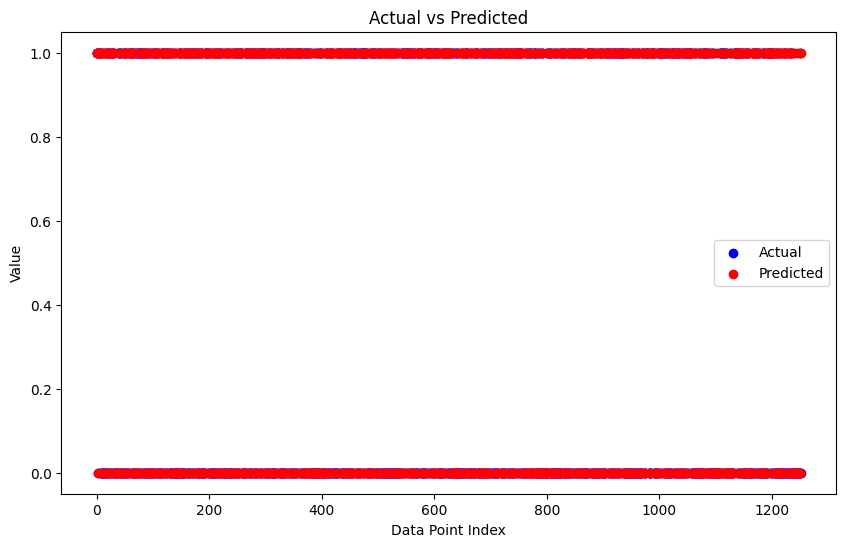

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [9]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.3f}")

# Precision Score
precision = precision_score(y_test, y_pred)
print(f"\nPrecision: {precision*100:.3f}")

# Recall Score
recall = recall_score(y_test, y_pred)
print(f"\nRecall: {recall*100:.3f}")

# roc_auc Score
y_proba = clf.predict_proba(X_test_scaled)[:, 1]
print(f"\nROC AUC Score: {(roc_auc_score(y_test, y_proba))*100:.3f}")

Accuracy: 71.349

Precision: 64.955

Recall: 77.199

ROC AUC Score: 78.683


In [11]:
print(clf.score(X_train_scaled, y_train))
print(clf.score(X_test_scaled, y_test))

0.7284517158818835
0.713487629688747


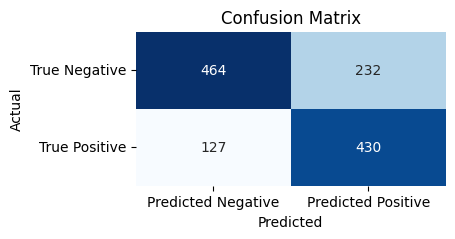

In [13]:
con_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(con_m, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
f1_score(y_test, y_pred)

0.7054963084495488

#### HyperParameter Tunning

In [16]:
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['poly', 'linear' ],         # Kernel type
    'degree': [2, 3, 4, 5],          # Polynomial degree
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

In [17]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'linear']},
             scoring='accuracy')

In [18]:
best_params = grid_search.best_params_
clf.set_params(**best_params)

SVC(C=10, class_weight='balanced', degree=5, gamma='auto', kernel='poly',
    probability=True, random_state=42)

In [20]:
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [21]:
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.3f}")

precision = precision_score(y_test, y_pred)
print(f"\nPrecision: {precision*100:.3f}")

recall = recall_score(y_test, y_pred)
print(f"\nRecall: {recall*100:.3f}")

# roc_auc Score
y_proba = clf.predict_proba(X_test_scaled)[:, 1]
print(f"\nROC AUC Score: {(roc_auc_score(y_test, y_proba))*100:.3f}")

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       696
           1       0.72      0.80      0.76       557

    accuracy                           0.78      1253
   macro avg       0.78      0.78      0.77      1253
weighted avg       0.78      0.78      0.78      1253

Accuracy: 77.574

Precision: 72.330

Recall: 80.251

ROC AUC Score: 83.889


In [22]:
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1*100:.3f}")

F1-score: 76.085


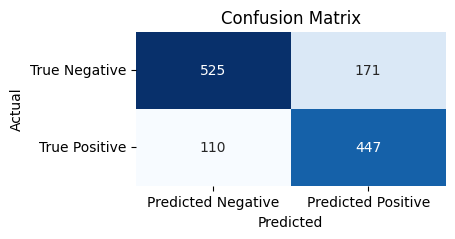

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()